## **Práctica 13: Pronóstico (Bosques Aleatorios)**

Nombre: Brandon Cervantes Rubí

No. Cuenta: 316136741

Email: mrkyloren117@gmail.com

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

**Objetivo.** Pronosticar el área del tumor de pacientes con indicios de casos de cáncer de mama a través de bosques aleatorios.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving WDBCOriginal.csv to WDBCOriginal.csv


{'WDBCOriginal.csv': b'\xef\xbb\xbfIDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension\r\nP-842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871\r\nP-842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667\r\nP-84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999\r\nP-84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744\r\nP-84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883\r\nP-843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613\r\nP-844359,M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742\r\nP-84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451\r\nP-844981,M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389\r\nP-84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243\r\nP-845636,M,16.02,23.24,102.7,79

In [3]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer 

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [4]:
BCancer.describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


#### **2) Gráfica del área del tumor por paciente**


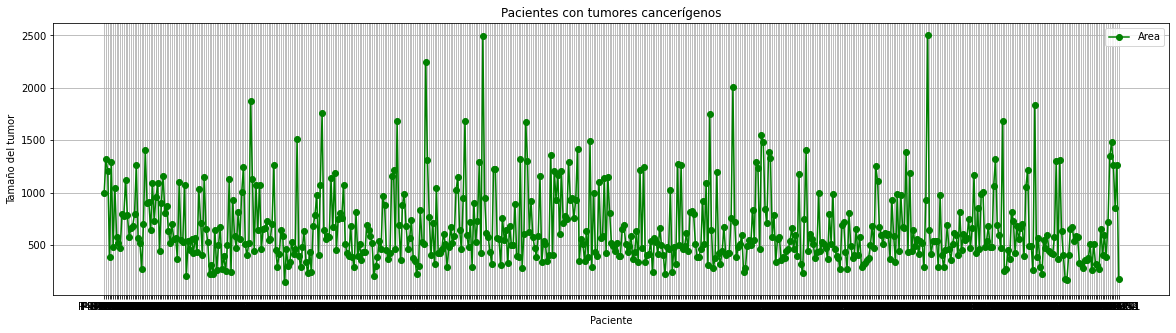

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(BCancer['IDNumber'], BCancer['Area'], color='green', marker='o', label='Area')
plt.xlabel('Paciente')
plt.ylabel('Tamaño del tumor')
plt.title('Pacientes con tumores cancerígenos')
plt.grid(True)
plt.legend()
plt.show()

#### **3) Selección de características**

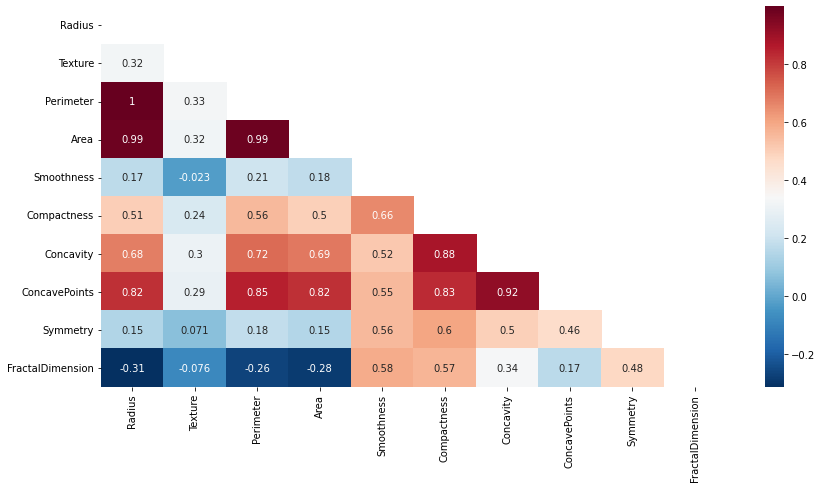

In [ ]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show() 

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Smoothness [Posición 6]

4) Compactness [Posición 7]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

*7) Perimeter [Posición 4] - Para calcular el área del tumor -

#### **4) División de datos y aplicación del algoritmo**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [ ]:
X = np.array(BCancer[['Texture',
                      'Perimeter',
                      'Smoothness',	
                      'Compactness',	
                      'Symmetry',	
                      'FractalDimension']])
pd.DataFrame(X)

#X = np.array(BCancer[['Radius', 'Texture', 'Perimeter', 'Smoothness', 'Compactness',	'Concavity', 'ConcavePoints', 'Symmetry',	'FractalDimension']
#pd.DataFrame(X)

,0,1,2,3,4,5
0,10.38,122.80,0.11840,0.27760,0.2419,0.07871
1,17.77,132.90,0.08474,0.07864,0.1812,0.05667
2,21.25,130.00,0.10960,0.15990,0.2069,0.05999
3,20.38,77.58,0.14250,0.28390,0.2597,0.09744
4,14.34,135.10,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,142.00,0.11100,0.11590,0.1726,0.05623
565,28.25,131.20,0.09780,0.10340,0.1752,0.05533
566,28.08,108.30,0.08455,0.10230,0.1590,0.05648
567,29.33,140.10,0.11780,0.27700,0.2397,0.07016


In [ ]:
Y = np.array(BCancer[['Area']])
pd.DataFrame(Y)

,0
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


Se hace la división de los datos

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 1234, 
                                                                    shuffle = True)

In [ ]:
pd.DataFrame(X_train)
#pd.DataFrame(X_test)

,0,1,2,3,4,5
0,18.22,84.45,0.12180,0.16610,0.1709,0.07253
1,22.44,71.49,0.09566,0.08194,0.2030,0.06552
2,20.76,82.15,0.09933,0.12090,0.1735,0.07070
3,23.84,82.69,0.11220,0.12620,0.1905,0.06590
4,18.32,66.82,0.08142,0.04462,0.2372,0.05768
...,...,...,...,...,...,...
450,15.18,88.99,0.09516,0.07688,0.2110,0.05853
451,15.10,141.30,0.10010,0.15150,0.1973,0.06183
452,18.60,81.09,0.09965,0.10580,0.1925,0.06373
453,18.70,120.30,0.11480,0.14850,0.2092,0.06310


In [ ]:
pd.DataFrame(Y_train)
#pd.DataFrame(Y_test)

,0
0,493.1
1,378.4
2,480.4
3,499.0
4,340.9
...,...
450,587.4
451,1386.0
452,481.9
453,1033.0


Se entrena el modelo a través de un bosque aleatorio

In [ ]:
#CONF 1: 98.97% de score
#PronosticoBA = RandomForestRegressor(random_state=0)
#PronosticoBA.fit(X_train, Y_train)

#Conf 2: 98.62%
#PronosticoBA = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=2, min_samples_split=4)
#PronosticoBA.fit(X_train, Y_train)

#Conf 3: 98.65% para 150, probar con 200 y 50
#PronosticoBA = RandomForestRegressor(n_estimators=150, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0)
#PronosticoBA.fit(X_train, Y_train)

#Conf 4: Con las 4 variables mas importantes es 97.9%
PronosticoBA = RandomForestRegressor(n_estimators=150, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0, max_features=4)
PronosticoBA.fit(X_train, Y_train)

#Que tanto cambia el score con 50, 150 y 200, la cantidad depende de como se vaya a comportar
#Mientras suba el numero de estimadores tambien lo hace el costo computacional y eventualmente se estabiliza

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(max_depth=8, max_features=4, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=150, random_state=0)

Se genera el pronóstico

In [ ]:
#Se genera el pronóstico
Y_Pronostico = PronosticoBA.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,417.754845
1,353.190819
2,491.074515
3,276.151485
4,564.150830
...,...
109,419.577772
110,1078.019085
111,549.758804
112,553.735516


In [ ]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
417.754845,416.2
353.190819,357.6
491.074515,476.7
276.151485,269.4
564.150830,568.9
...,...
419.577772,419.8
1078.019085,1094.0
549.758804,551.7
553.735516,565.4


In [ ]:
r2_score(Y_test, Y_Pronostico)

0.9790169117005888

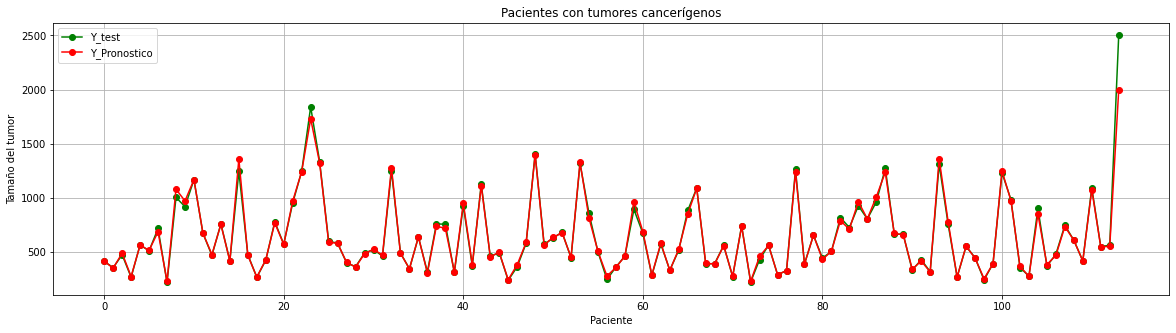

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='green', marker='o', label='Y_test')
plt.plot(Y_Pronostico, color='red', marker='o', label='Y_Pronostico')
plt.xlabel('Paciente')
plt.ylabel('Tamaño del tumor')
plt.title('Pacientes con tumores cancerígenos')
plt.grid(True)
plt.legend()
plt.show()

#### **5) Obtención de los parámetros del modelo**

In [ ]:
print('Criterio: \n', PronosticoBA.criterion)
print('Importancia variables: \n', PronosticoBA.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [0.00962509 0.88571167 0.00706887 0.05590388 0.00445055 0.03723993]
MAE: 18.1460
MSE: 2801.5598
RMSE: 52.9298
Score: 0.9790


In [ ]:
Importancia = pd.DataFrame({'Variable': list(BCancer[['Texture', 'Perimeter', 'Smoothness',	
                                            'Compactness', 'Symmetry', 'FractalDimension']]),
                            'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,Perimeter,0.885712
3,Compactness,0.055904
5,FractalDimension,0.037240
0,Texture,0.009625
2,Smoothness,0.007069
4,Symmetry,0.004451


#### **6) Conformación del modelo de pronóstico**

* El error absoluto medio (MAE) del algoritmo es 16.79, que es alrededor de 2.5% de la media de todos los valores de la variable 'Area' (654.88). Esto significa que el algoritmo realiza un notable pronóstico.

* Además, se tiene un Score de 0.9863, el cual indica que el pronóstico del Area del tumor se logrará con un 98.6% de efectividad.

* Por otro lado, los pronósticos del modelo final se alejan en promedio 42.8 (RMSE) unidades del valor real.


**Para graficar el árbol, se puede utilizar alguno de los estimadores**

In [ ]:
Estimador = PronosticoBA.estimators_[99]
Estimador

DecisionTreeRegressor(max_depth=8, max_features=4, min_samples_leaf=2,
                      min_samples_split=4, random_state=1396067212)

In [ ]:
#!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

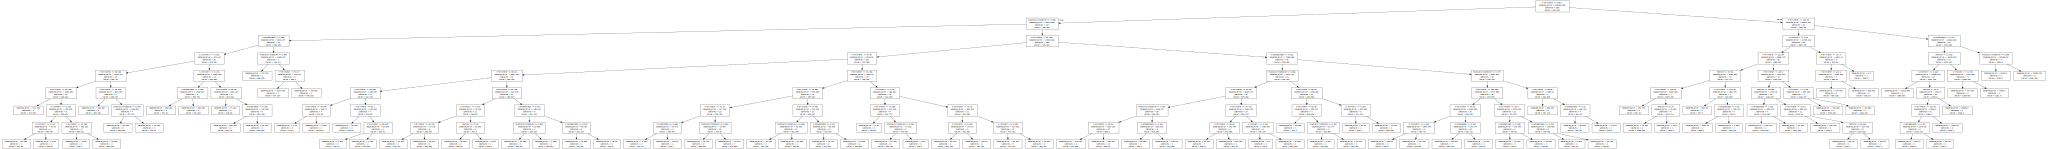

In [ ]:
# Se crea un objeto para visualizar el árbol
# Se incluyen los nombres de las variables para imprimirlos en el árbol
Elementos = export_graphviz(Estimador, 
                            feature_names = ['Texture', 'Perimeter', 'Smoothness', 
                                             'Compactness', 'Symmetry', 'FractalDimension'])  
Arbol = graphviz.Source(Elementos)
Arbol

La imagen del árbol es grande, pero se puede leer en el siguiente orden:

1. La decisión que se toma para dividir el nodo.
2. El tipo de criterio que se usó para dividir cada nodo.
3. Cuantos valores tiene ese nodo.
4. Valores promedio.
5. Por último, el valor pronosticado en ese nodo.

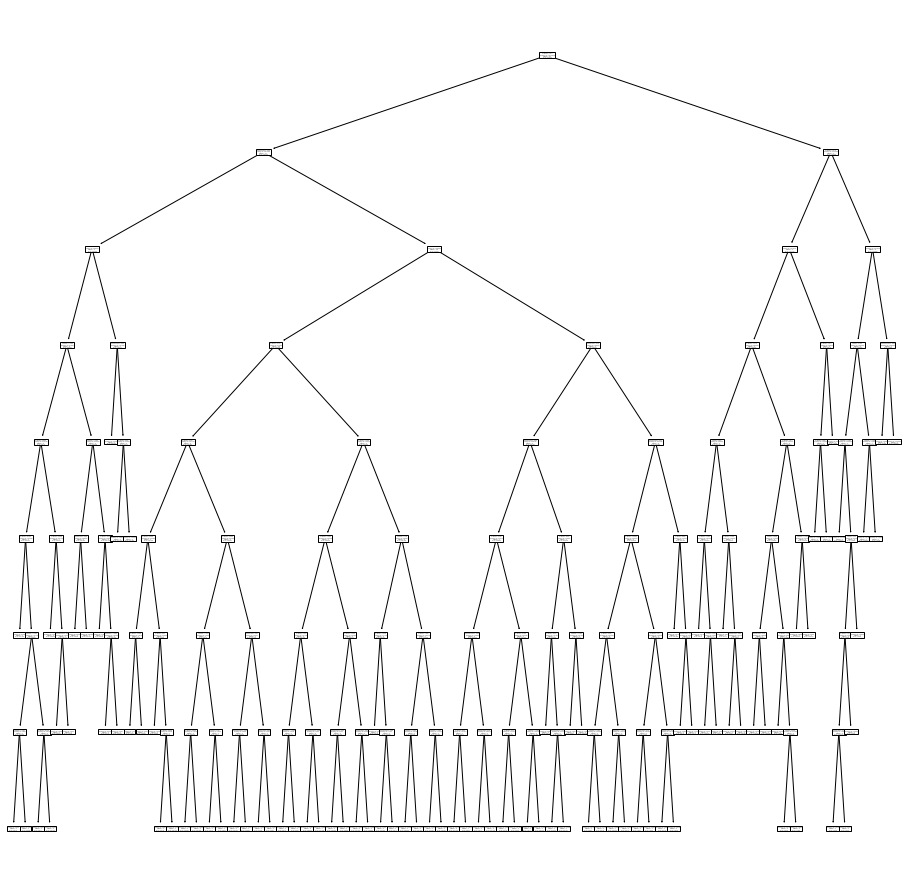

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Texture', 'Perimeter', 'Smoothness', 'Compactness', 
                           'Symmetry', 'FractalDimension'])
plt.show()

In [ ]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Texture', 'Perimeter', 'Smoothness', 
                                       'Compactness', 'Symmetry', 'FractalDimension'])
print(Reporte)

|--- Perimeter <= 108.20
|   |--- Perimeter <= 81.49
|   |   |--- Perimeter <= 67.96
|   |   |   |--- Perimeter <= 59.23
|   |   |   |   |--- Perimeter <= 53.84
|   |   |   |   |   |--- Perimeter <= 49.84
|   |   |   |   |   |   |--- value: [179.90]
|   |   |   |   |   |--- Perimeter >  49.84
|   |   |   |   |   |   |--- value: [203.57]
|   |   |   |   |--- Perimeter >  53.84
|   |   |   |   |   |--- Perimeter <= 56.10
|   |   |   |   |   |   |--- value: [226.52]
|   |   |   |   |   |--- Perimeter >  56.10
|   |   |   |   |   |   |--- Perimeter <= 58.88
|   |   |   |   |   |   |   |--- value: [245.75]
|   |   |   |   |   |   |--- Perimeter >  58.88
|   |   |   |   |   |   |   |--- value: [261.93]
|   |   |   |--- Perimeter >  59.23
|   |   |   |   |--- Perimeter <= 64.43
|   |   |   |   |   |--- Perimeter <= 60.27
|   |   |   |   |   |   |--- value: [276.17]
|   |   |   |   |   |--- Perimeter >  60.27
|   |   |   |   |   |   |--- Texture <= 14.24
|   |   |   |   |   |   |   |--- value:

#### **7) Nuevos pronósticos**

In [ ]:
AreaTumorID1 = pd.DataFrame({'Texture': [10.38], 
                             'Perimeter': [122.8], 
                             'Smoothness': [0.11840], 
                             'Compactness': [0.27760], 
                             'Symmetry': [0.2419], 
                             'FractalDimension': [0.07871]})
PronosticoBA.predict(AreaTumorID1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1028.75772738])